In [1]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset into a dataframe
data = pd.read_csv('../data/processed/final_dataset.csv')

In [4]:
data.shape

(25456, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25456 entries, 0 to 25455
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         25456 non-null  object 
 1   Total Cases                     25456 non-null  int64  
 2   New Cases                       25456 non-null  float64
 3   Total Deaths                    25456 non-null  float64
 4   New Deaths                      25456 non-null  float64
 5   Total Recovered                 25456 non-null  float64
 6   New Recovered                   25456 non-null  float64
 7   Active Cases                    25456 non-null  float64
 8   Serious, Critical               25456 non-null  float64
 9   Tot Cases/1M pop                25456 non-null  float64
 10  Deaths/1M pop                   25456 non-null  float64
 11  Total Tests                     25456 non-null  float64
 12  Tests/1M pop                    

In [6]:
data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
1,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
2,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
3,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
4,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58


In [10]:
# Convert date column to date format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [11]:
# Selecting specific columns from the current DataFrame
Q1 = data.loc[:, ['Region', 'Country', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop', 'total_vaccinations', 'Year','date']]

# Displaying the first few rows of Q1
print(Q1.head())

                  Region Country  Tot Cases/1M pop  Deaths/1M pop   
0  Europe & Central Asia  France          612013.0         2556.0  \
1  Europe & Central Asia  France          612013.0         2556.0   
2  Europe & Central Asia  France          612013.0         2556.0   
3  Europe & Central Asia  France          612013.0         2556.0   
4  Europe & Central Asia  France          612013.0         2556.0   

   Tests/1M pop  total_vaccinations  Year       date  
0     4139547.0                 593  2019 2020-12-27  
1     4139547.0                1242  2019 2020-12-28  
2     4139547.0                1610  2019 2020-12-29  
3     4139547.0                2043  2019 2020-12-30  
4     4139547.0                2403  2019 2020-12-31  


In [12]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by 'Region' column in ascending order
Q1_sorted = Q1.sort_values(by='Region')

C:\Users\joann\AppData\Local\Temp\ipykernel_3456\891637448.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


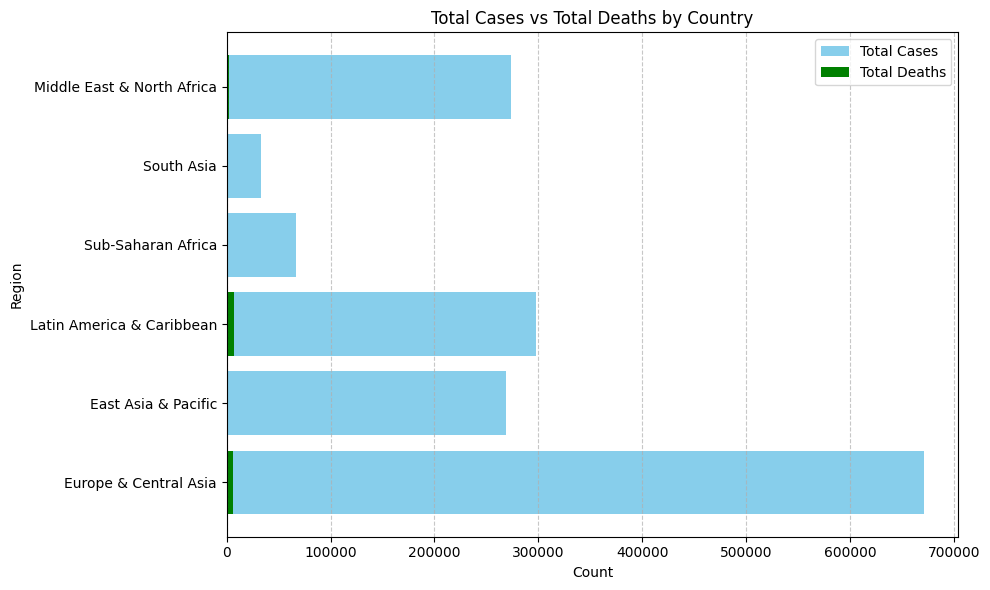

In [17]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(Q1['Region'], Q1['Tot Cases/1M pop'], color='skyblue', label='Total Cases')
plt.barh(Q1['Region'], Q1['Deaths/1M pop'], color='green', label='Total Deaths')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Total Cases vs Total Deaths by Country')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

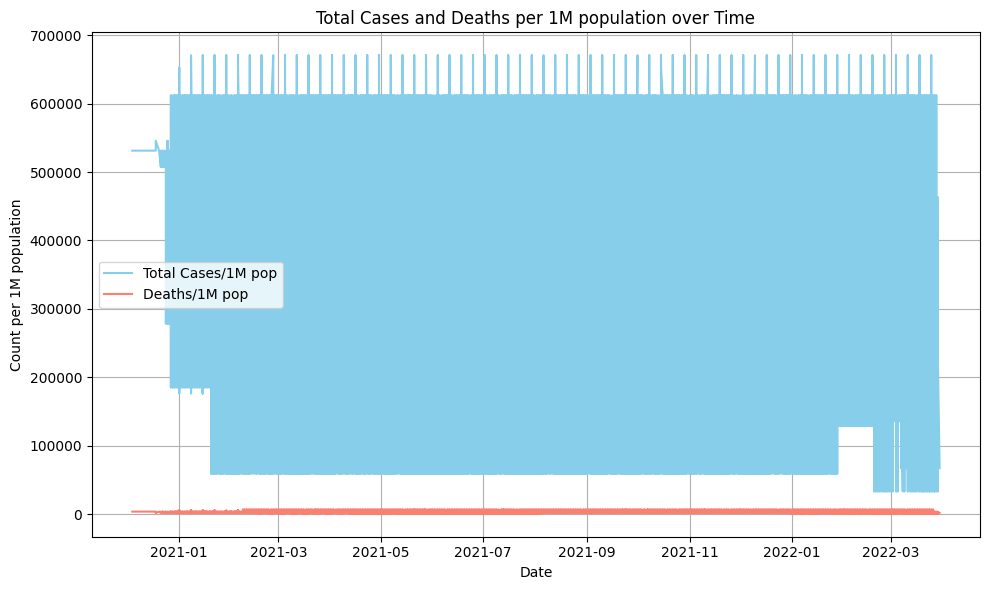

In [22]:
# Sort the DataFrame by date
time_sorted = Q1.sort_values('date')

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot total cases per 1M population
plt.plot(time_sorted['date'], time_sorted['Tot Cases/1M pop'], color='skyblue', label='Total Cases/1M pop')

# Plot total deaths per 1M population
plt.plot(time_sorted['date'], time_sorted['Deaths/1M pop'], color='salmon', label='Deaths/1M pop')

plt.xlabel('Date')
plt.ylabel('Count per 1M population')
plt.title('Total Cases and Deaths per 1M population over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()